In [1]:
import os
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gc

In [2]:
pd.set_option('max_columns', None)

In [3]:
input_dir = os.path.join('..', 'input')
file_csv = [file for file in os.listdir(input_dir) if file.endswith('.csv')]
print(file_csv)

['historical_transactions.csv', 'merchants.csv', 'new_merchant_transactions.csv', 'sample_submission.csv', 'train.csv', 'test.csv']


In [4]:
## Pandas@reduce dataframe memory
def reduce_mem_usage(props, fillna=False, fillval=None):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                if not fillna:
                    print('[*]skip {} cause of NA value'.format(col))
                    continue
                NAlist.append(col)
                props[col].fillna(fillval,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True
  
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < pow(2, 8)-1:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < pow(2, 16)-1:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < pow(2, 32)-1:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",props[col].dtype)
            print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

In [5]:
#python #python/pandas
trans_df = pd.read_csv(os.path.join(input_dir, 'historical_transactions.csv'))
train_df = pd.read_csv(os.path.join(input_dir, 'train.csv'))
new_trans_df = pd.read_csv(os.path.join(input_dir, 'new_merchant_transactions.csv'))
test_df = pd.read_csv(os.path.join(input_dir, 'test.csv'))

trans_df, _ = reduce_mem_usage(trans_df, fillna=True, fillval=-999)
test_df, _ = reduce_mem_usage(test_df, fillna=True, fillval=-999)
train_df, _ = reduce_mem_usage(train_df, fillna=False, fillval=-999)
new_trans_df, _ = reduce_mem_usage(new_trans_df, fillna=True, fillval=-999)

Memory usage of properties dataframe is : 3109.5357055664062  MB
******************************
Column:  city_id
dtype before:  int64
dtype after:  int16
******************************
******************************
Column:  installments
dtype before:  int64
dtype after:  int16
******************************
******************************
Column:  merchant_category_id
dtype before:  int64
dtype after:  int16
******************************
******************************
Column:  month_lag
dtype before:  int64
dtype after:  int8
******************************
******************************
Column:  purchase_amount
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  category_2
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  state_id
dtype before:  int64
dtype after:  int8
******************************
******************************
Column:  subsector_id
dtype 

In [6]:
print('[*]train_df : ', train_df.shape)
print('[*]test_df : ', test_df.shape)
print('[*]trans_df : ', trans_df.shape)
print('[*]new_trans_df : ', new_trans_df.shape)

[*]train_df :  (201917, 6)
[*]test_df :  (123623, 5)
[*]trans_df :  (29112361, 14)
[*]new_trans_df :  (1963031, 14)


# check card_id

In [7]:
trans_id = set(trans_df.card_id.unique())
new_trans_id = set(new_trans_df.card_id.unique())
train_id = set(train_df.card_id.unique())
test_id = set(test_df.card_id.unique())
print('trans_id : {}'.format(len(trans_id)))
print('new_trans_id : {}'.format(len(new_trans_id)))
print('train_id : {}'.format(len(train_id)))
print('test_id : {}'.format(len(test_id)))

trans_id : 325540
new_trans_id : 290001
train_id : 201917
test_id : 123623


In [8]:
#100% data in trans_df
print('[*]train data in trans', 1 - len(train_id - trans_id)/len(train_id))
print('[*]test data in trans', 1 - len(test_id - trans_id)/len(test_id))

[*]train data in trans 1.0
[*]test data in trans 1.0


In [9]:
#about 90% data in new_trans_df
print('[*]train data in new_trans', 1 - len(train_id - new_trans_id)/len(train_id))
print('[*]test data in new_trans', 1 - len(test_id - new_trans_id)/len(test_id))

[*]train data in new_trans 0.8913860645710862
[*]test data in new_trans 0.8899233961317878


In [10]:
all_trans_df = pd.concat([trans_df, new_trans_df])
all_trans_df = pd.merge(all_trans_df, train_df, on=['card_id'], how='left')
del train_df, test_df, trans_df, new_trans_df
gc.collect()

42

In [11]:
all_trans_df = all_trans_df[all_trans_df.target.notnull()]
all_trans_df, _ = reduce_mem_usage(all_trans_df)
print('[*]all_trans_df : ', all_trans_df.shape)

Memory usage of properties dataframe is : 1964.2994480133057  MB
******************************
Column:  city_id
dtype before:  int16
dtype after:  int16
******************************
******************************
Column:  installments
dtype before:  int16
dtype after:  int16
******************************
******************************
Column:  merchant_category_id
dtype before:  int16
dtype after:  int16
******************************
******************************
Column:  month_lag
dtype before:  int16
dtype after:  int8
******************************
******************************
Column:  purchase_amount
dtype before:  float32
dtype after:  float32
******************************
******************************
Column:  category_2
dtype before:  uint8
dtype after:  uint8
******************************
******************************
Column:  state_id
dtype before:  int8
dtype after:  int8
******************************
******************************
Column:  subsector_id
dtype bef

In [12]:
all_trans_df.head(3)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,first_active_month,feature_1,feature_2,feature_3,target
400,N,C_ID_5037ff576e,322,N,1,B,278,M_ID_b61c7d1be0,-3,-0.595260,2017-09-07 20:57:19,3,11,37,2017-01,5,1,1,-2.352713
401,Y,C_ID_5037ff576e,138,N,1,B,307,M_ID_fe69229f24,-4,1.189469,2017-08-14 15:46:08,1,15,19,2017-01,5,1,1,-2.352713
402,Y,C_ID_5037ff576e,138,N,1,B,705,M_ID_efc106141c,-9,-0.640069,2017-03-05 14:57:51,1,15,33,2017-01,5,1,1,-2.352713


In [13]:
all_trans_df['first_active_year'] = all_trans_df['first_active_month'].apply(lambda x: x[0:4])

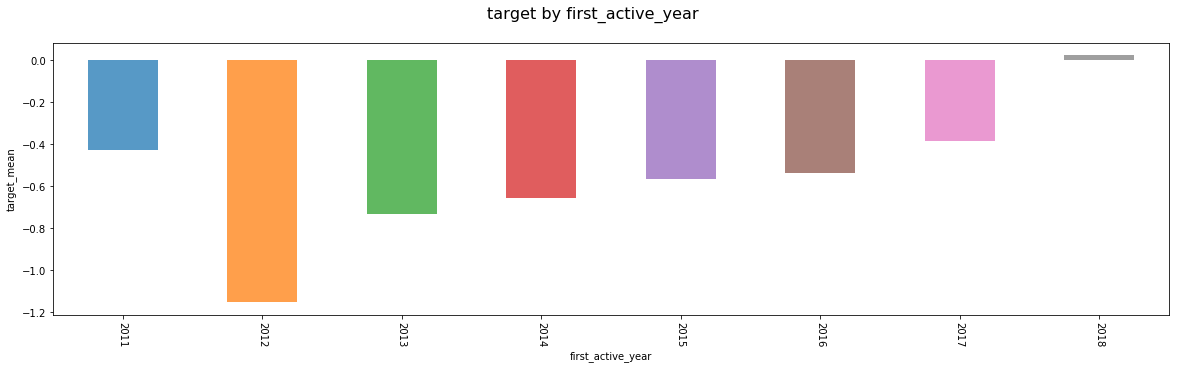

In [76]:
fig = plt.figure(figsize=(20, 5))
plt.suptitle('target by first_active_year', fontsize=16)
plt.ylabel('target_mean')
all_trans_df.groupby(['first_active_year']).target.mean().plot(kind='bar',alpha=0.75, rot=-90)

use first_active_year<br/>
features : [first_active_year]

Text(0, 0.5, 'target_mean')

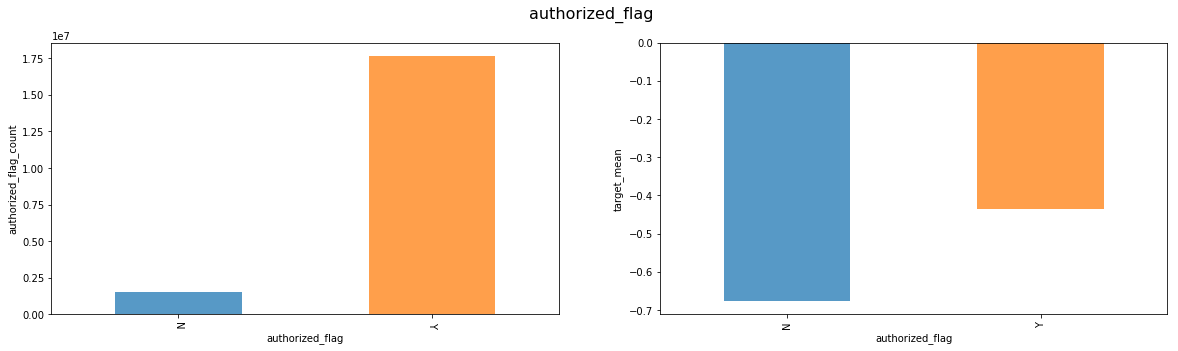

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
plt.suptitle('authorized_flag', fontsize=16)
all_trans_df.groupby(['authorized_flag']).size().plot(kind='bar',alpha=0.75, rot=-90, ax=axes[0])
axes[0].set_ylabel('authorized_flag_count')
all_trans_df.groupby(['authorized_flag']).target.mean().plot(kind='bar',alpha=0.75, rot=-270, ax=axes[1])
axes[1].set_ylabel('target_mean')

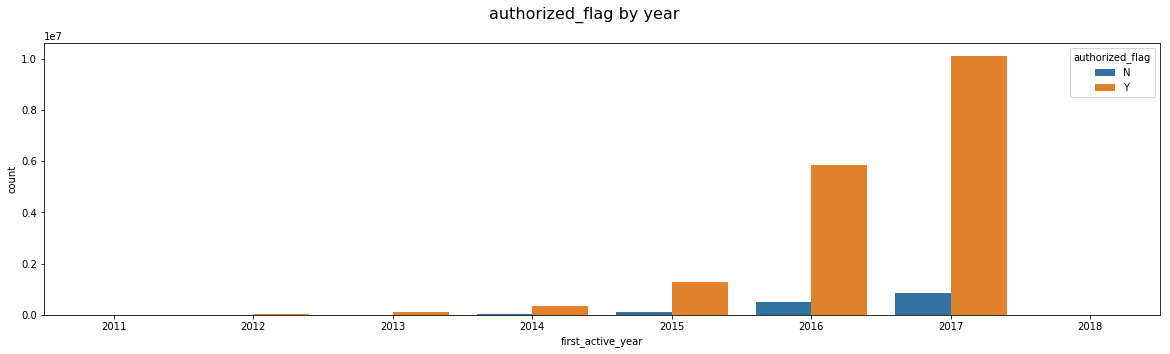

In [16]:
fig = plt.figure(figsize=(20, 5))
plt.suptitle('authorized_flag by year', fontsize=16)
sns.countplot(x='first_active_year', hue='authorized_flag', data=all_trans_df)

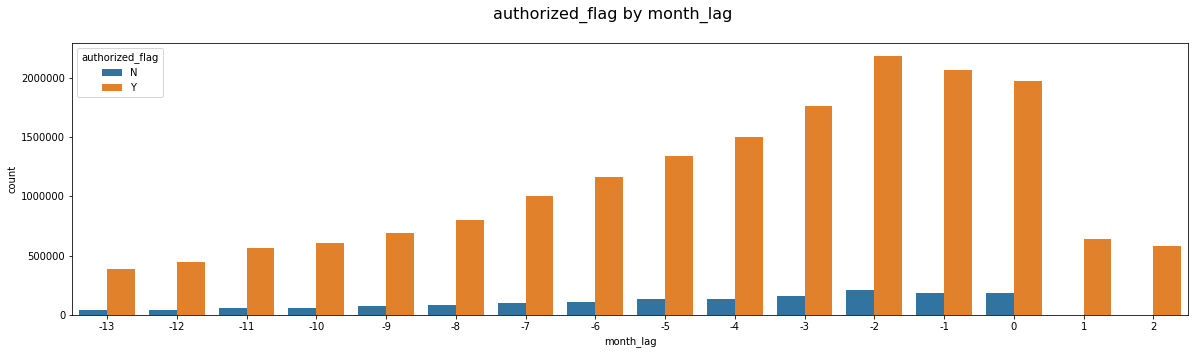

In [17]:
fig = plt.figure(figsize=(20, 5))
plt.suptitle('authorized_flag by month_lag', fontsize=16)
sns.countplot(x='month_lag', hue='authorized_flag', data=all_trans_df)

use authorized_flag<br/>
features : [first_active_year, authorized_flag]

# purchase_amount

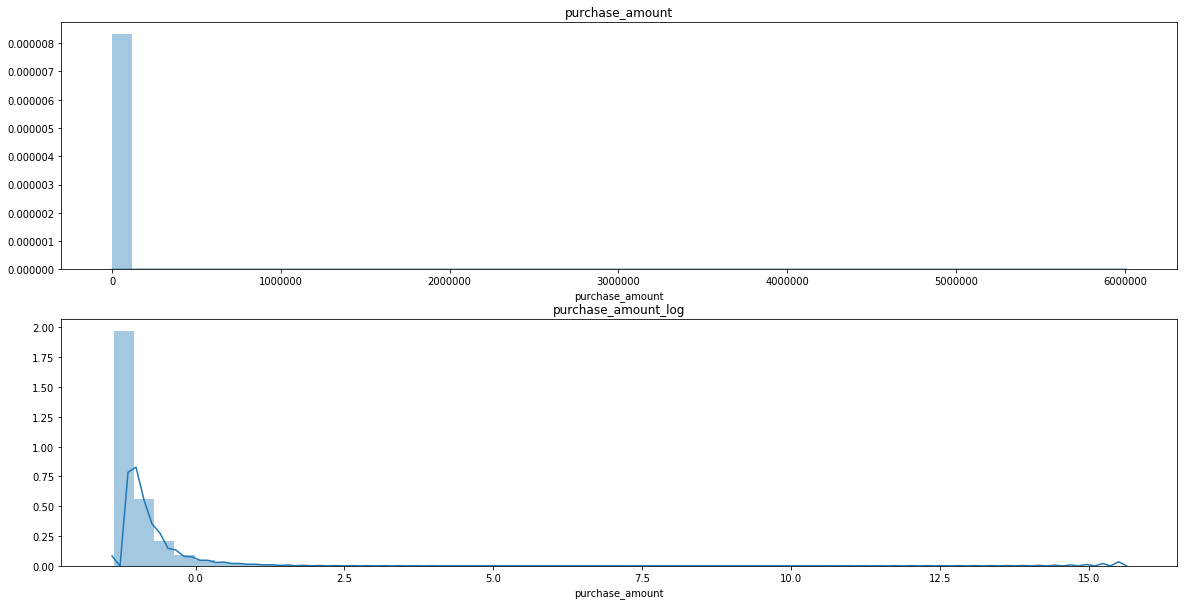

In [18]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
axes[0].set_title('purchase_amount')
sns.distplot(all_trans_df.purchase_amount, ax=axes[0])
axes[1].set_title('purchase_amount_log')
sns.distplot(np.log1p(all_trans_df.purchase_amount), ax=axes[1])

In [19]:
all_trans_df['purchase_amount_log'] = np.log1p(all_trans_df['purchase_amount'])

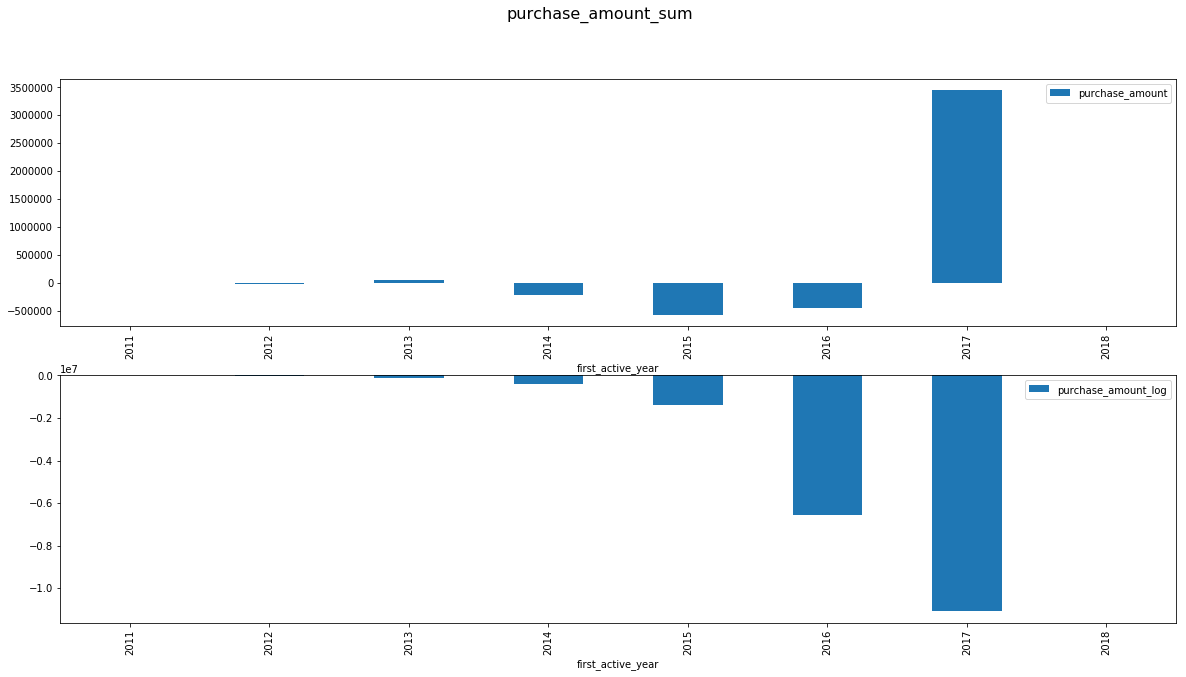

In [20]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
plt.suptitle('purchase_amount_sum', fontsize=16)
all_trans_df.groupby(['first_active_year']).aggregate({'purchase_amount':'sum'}).plot(kind='bar', ax=axes[0])
all_trans_df.groupby(['first_active_year']).aggregate({'purchase_amount_log':'sum'}).plot(kind='bar', ax=axes[1])

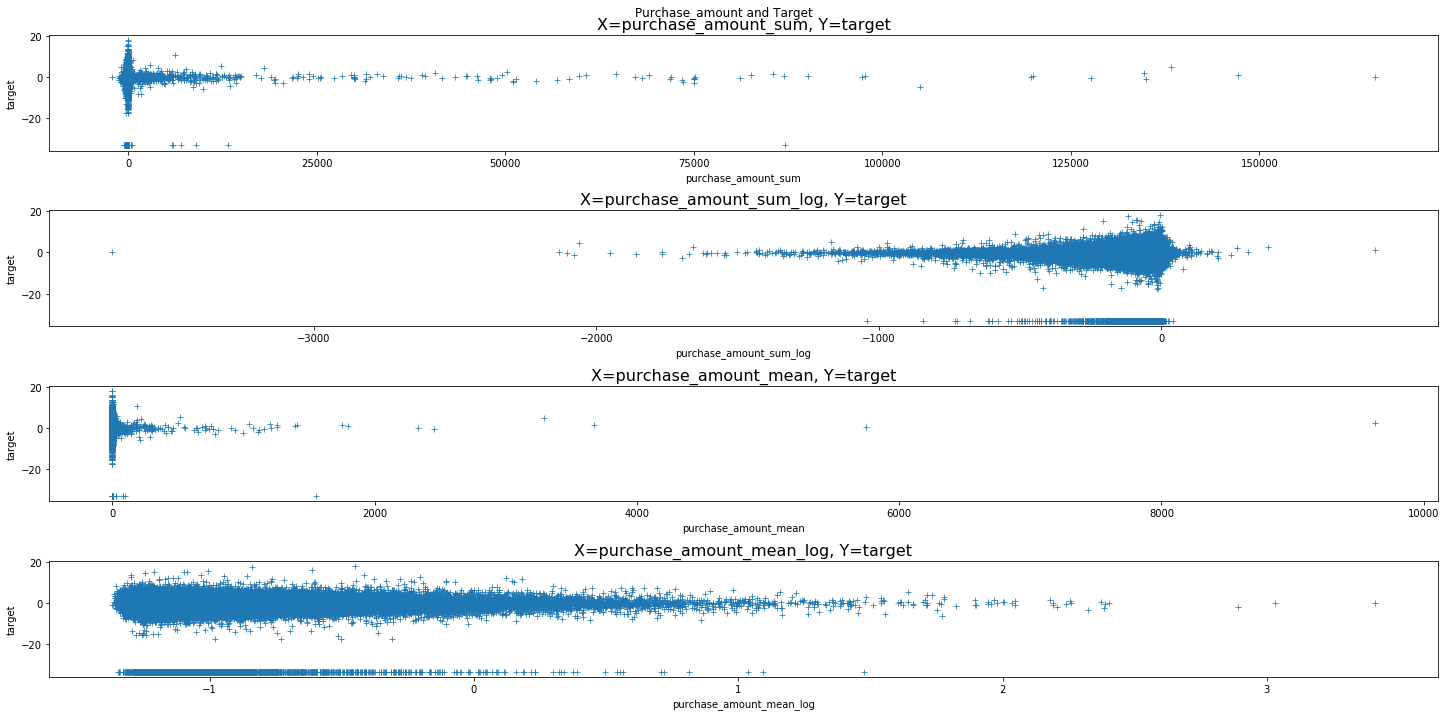

In [49]:
#target ~ purchase amount sum
test_df = all_trans_df.groupby(['card_id']).aggregate({'purchase_amount':['mean', 'sum'], 'target':'mean', 'purchase_amount_log': ['mean', 'sum']})
test_df.columns = ['purchase_amount_mean', 'purchase_amount_sum', 'target', 'purchase_amount_mean_log', 'purchase_amount_sum_log']
idx = test_df.purchase_amount_sum < 1000000

fig, axes = plt.subplots(4, 1, figsize=(20, 10), constrained_layout=True)
fig.suptitle('Purchase_amount and Target')
axes[0].set_xlabel('purchase_amount_sum')
axes[0].set_ylabel('target')
axes[0].set_title('X=purchase_amount_sum, Y=target', fontsize=16)
sns.scatterplot(x='purchase_amount_sum', y='target', data=test_df[idx], marker="+", ax=axes[0])

axes[1].set_xlabel('purchase_amount_sum_log')
axes[1].set_ylabel('target')
axes[1].set_title('X=purchase_amount_sum_log, Y=target', fontsize=16)
sns.scatterplot(x='purchase_amount_sum_log', y='target', data=test_df[idx], marker="+", ax=axes[1])

axes[2].set_xlabel('purchase_amount_mean')
axes[2].set_ylabel('target')
axes[2].set_title('X=purchase_amount_mean, Y=target', fontsize=16)
sns.scatterplot(x='purchase_amount_mean', y='target', data=test_df[idx], marker="+", ax=axes[2])

axes[3].set_xlabel('purchase_amount_mean_log')
axes[3].set_ylabel('target')
axes[3].set_title('X=purchase_amount_mean_log, Y=target', fontsize=16)
sns.scatterplot(x='purchase_amount_mean_log', y='target', data=test_df[idx], marker="+", ax=axes[3])

use purchase_amount_sum, purchase_amount_sum_log, purchase_amount_mean, purchase_amount_mean_log<br/>
features : [first_active_year, authorized_flag, purchase_amount_sum, purchase_amount_sum_log, purchase_amount_mean, purchase_amount_mean_log]

# card_id

In [22]:
test_df = all_trans_df.groupby(['card_id']).aggregate({'target':['size', 'mean']})
test_df.columns = ['size', 'target']
test_df['size_cut'] = pd.cut(test_df['size'], 30)
test_df['size_qcut'] = pd.qcut(test_df['size'], 30)

test_df_cut = test_df.groupby(["size_cut"]).aggregate({'target': ['mean', 'std']}).reset_index()
test_df_cut.columns = ['size_cut', 'cut_mean', 'cut_std']

test_df_qcut = test_df.groupby(["size_qcut"]).aggregate({'target': ['mean', 'std']}).reset_index()
test_df_qcut.columns = ['size_qcut', 'qcut_mean', 'qcut_std']

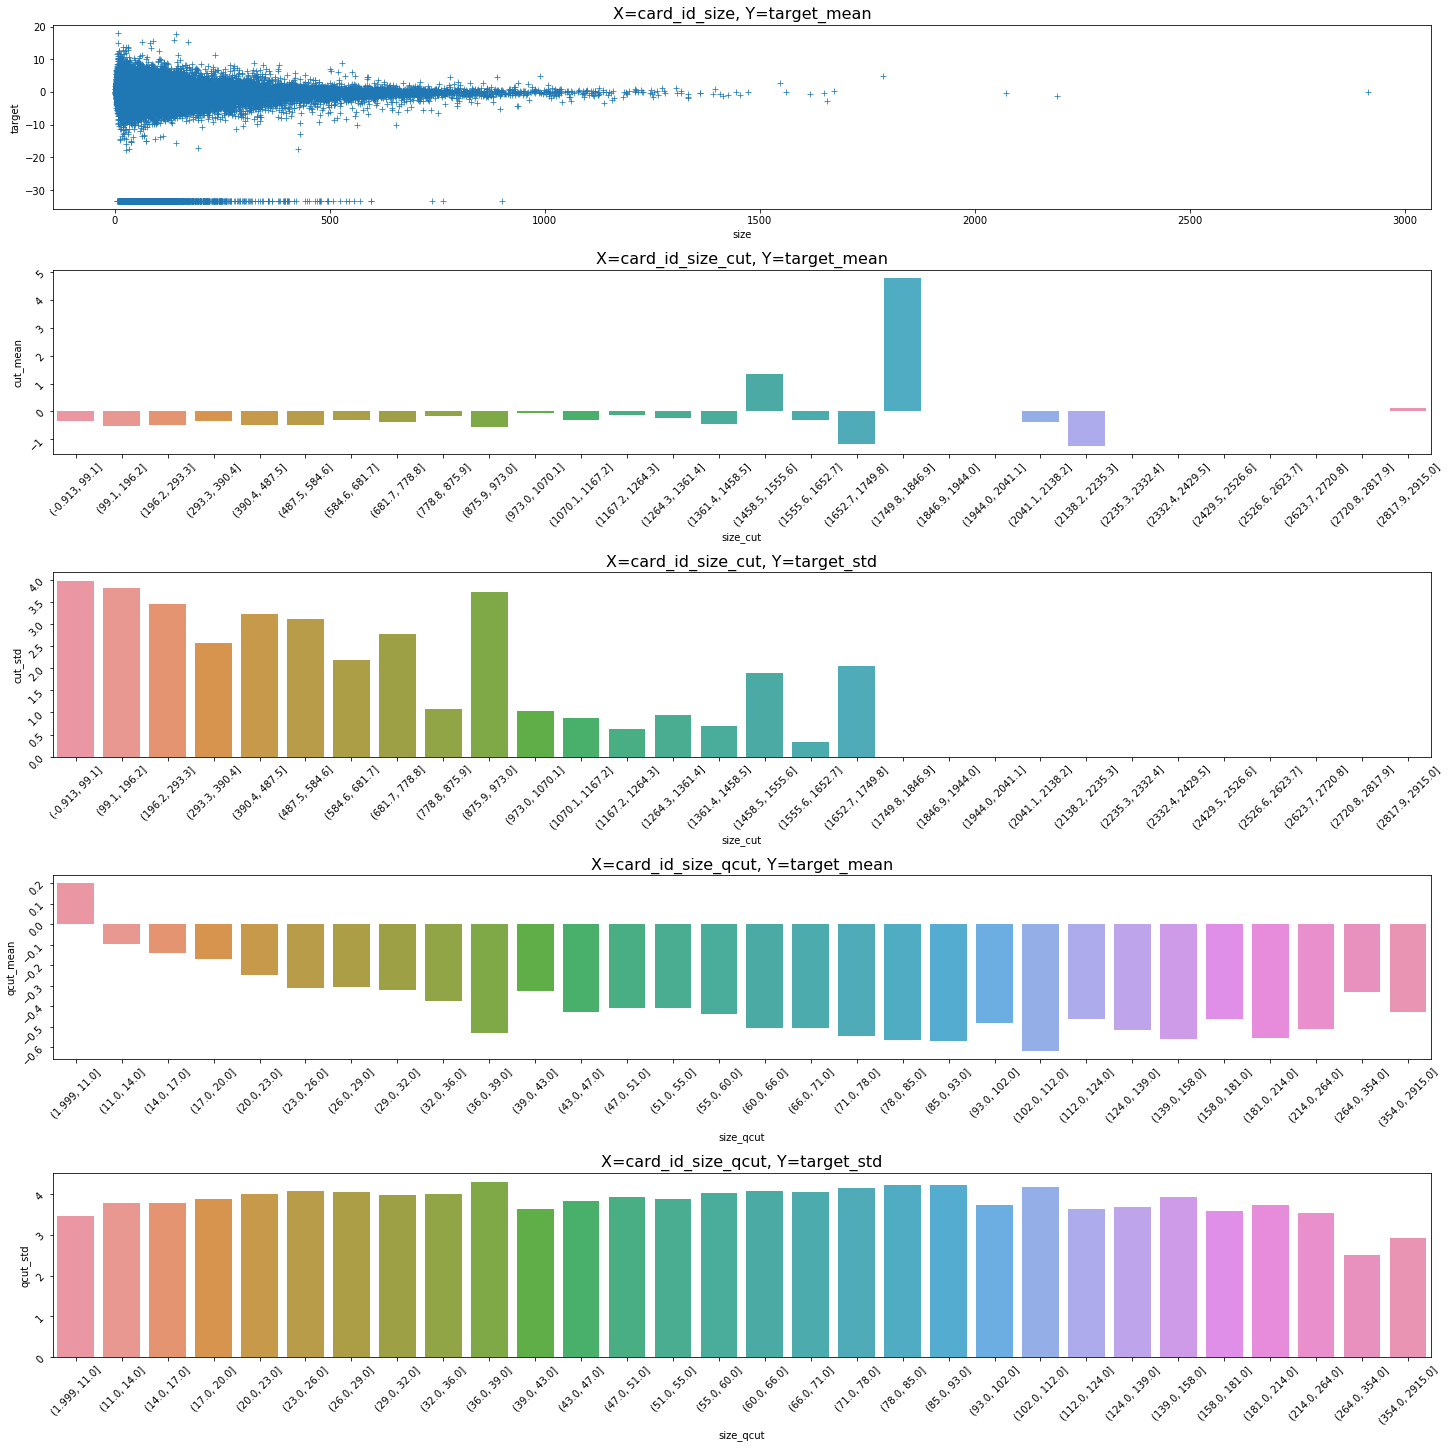

In [23]:
fig, axes = plt.subplots(5, 1, figsize=(20, 20), constrained_layout=True)

axes[0].set_xlabel('card_id_size')
axes[0].set_ylabel('target_mean')
axes[0].set_title('X=card_id_size, Y=target_mean', fontsize=16)
sns.scatterplot(x="size", y="target",
                data=test_df, marker="+",
                ax=axes[0])

axes[1].set_xlabel('card_id_size_cut')
axes[1].set_ylabel('target_mean')
axes[1].set_title('X=card_id_size_cut, Y=target_mean', fontsize=16)
axes[1].tick_params(labelrotation=45)
sns.barplot(x='size_cut', y='cut_mean', data=test_df_cut, ax=axes[1])

axes[2].set_xlabel('card_id_size_cut')
axes[2].set_ylabel('target_std')
axes[2].set_title('X=card_id_size_cut, Y=target_std', fontsize=16)
axes[2].tick_params(labelrotation=45)
sns.barplot(x='size_cut', y='cut_std',
            data=test_df_cut, ax=axes[2])

axes[3].set_xlabel('card_id_size_qcut')
axes[3].set_ylabel('target_mean')
axes[3].set_title('X=card_id_size_qcut, Y=target_mean', fontsize=16)
axes[3].tick_params(labelrotation=45)
sns.barplot(x='size_qcut', y='qcut_mean',
            data=test_df_qcut, ax=axes[3])

axes[4].set_xlabel('card_id_size_qcut')
axes[4].set_ylabel('target_std')
axes[4].set_title('X=card_id_size_qcut, Y=target_std', fontsize=16)
axes[4].tick_params(labelrotation=45)
sns.barplot(x='size_qcut', y='qcut_std',
            data=test_df_qcut, ax=axes[4])

# purchase_interval

In [24]:
all_trans_df.purchase_date = pd.to_datetime(all_trans_df.purchase_date,
                                            format='%Y-%m-%d %H:%M:%S')
all_trans_df.first_active_month = pd.to_datetime(all_trans_df.first_active_month, 
                                                 format='%Y-%m')
all_trans_df['purchase_interval'] = all_trans_df.purchase_date - all_trans_df.first_active_month 
all_trans_df['purchase_interval'] = all_trans_df.purchase_interval.apply(lambda x: x.days)

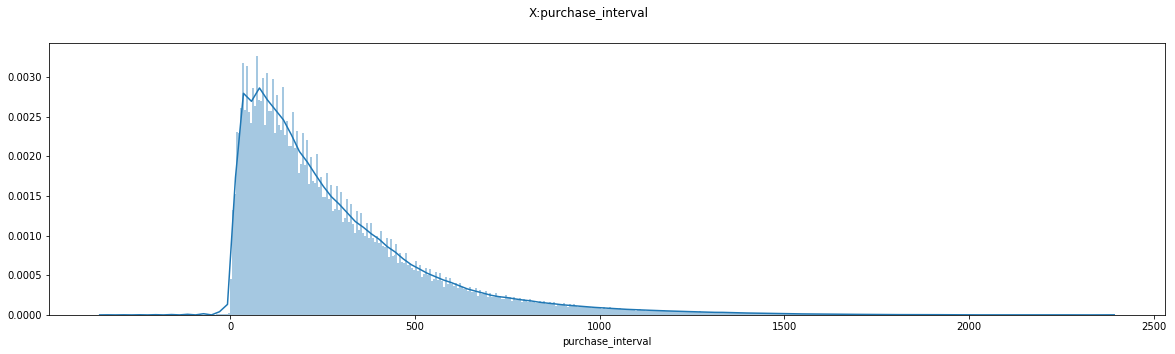

In [25]:
fig = plt.figure(figsize=(20, 5))
plt.suptitle('X:purchase_interval')
sns.distplot(all_trans_df.purchase_interval, bins=500)

In [26]:
#target ~ purchase_date - first_active
test_df = all_trans_df.groupby(['card_id']).aggregate({'purchase_interval': 'mean',
                                                       'target': 'mean'})
test_df['size_cut'] = pd.cut(test_df['purchase_interval'], 20)
test_df_size = test_df.groupby(["size_cut"]).aggregate({'target': ['mean',
                                                                   'std']}).reset_index()
test_df_size.columns = ['size_cut', 'mean', 'std']

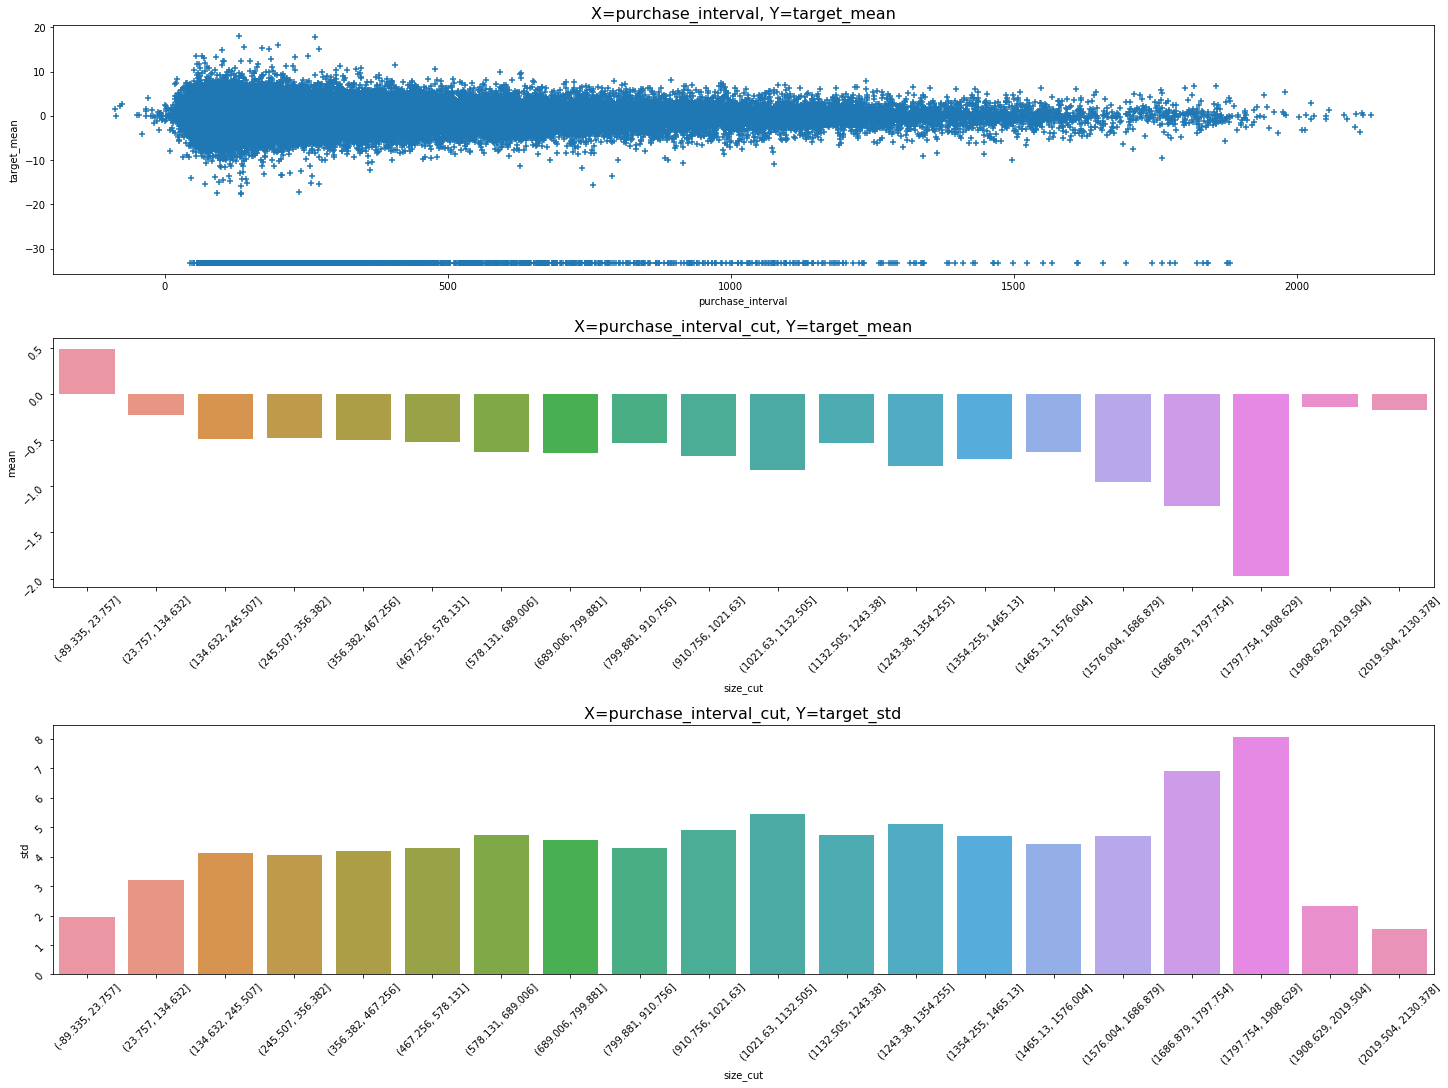

In [27]:
fig, axes = plt.subplots(3, 1, figsize=(20, 15), constrained_layout=True)
axes[0].set_title('X=purchase_interval, Y=target_mean', fontsize=16)
axes[0].set_xlabel('purchase_interval')
axes[0].set_ylabel('target_mean')
axes[0].scatter(x=test_df.purchase_interval, y=test_df.target, marker='+')

axes[1].set_xlabel('purchase_interval_cut')
axes[1].set_ylabel('target_mean')
axes[1].set_title('X=purchase_interval_cut, Y=target_mean', fontsize=16)
axes[1].tick_params(labelrotation=45)
sns.barplot(x='size_cut', y='mean', data=test_df_size, ax=axes[1])

axes[2].set_xlabel('purchase_amount_size_cut')
axes[2].set_ylabel('target_std')
axes[2].set_title('X=purchase_interval_cut, Y=target_std', fontsize=16)
axes[2].tick_params(labelrotation=45)
sns.barplot(x='size_cut', y='std', data=test_df_size, ax=axes[2])

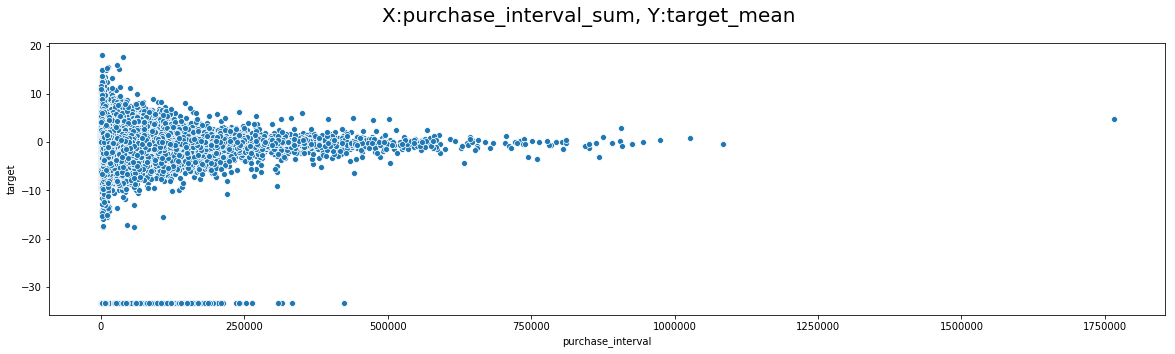

In [86]:
test_df = all_trans_df.groupby(['card_id']).aggregate({'purchase_interval': 'sum',
                                                       'target': 'mean'})
fig = plt.figure(figsize=(20, 5))
fig.suptitle('X:purchase_interval_sum, Y:target_mean', fontsize=20)
sns.scatterplot(x='purchase_interval', y='target', data=test_df)

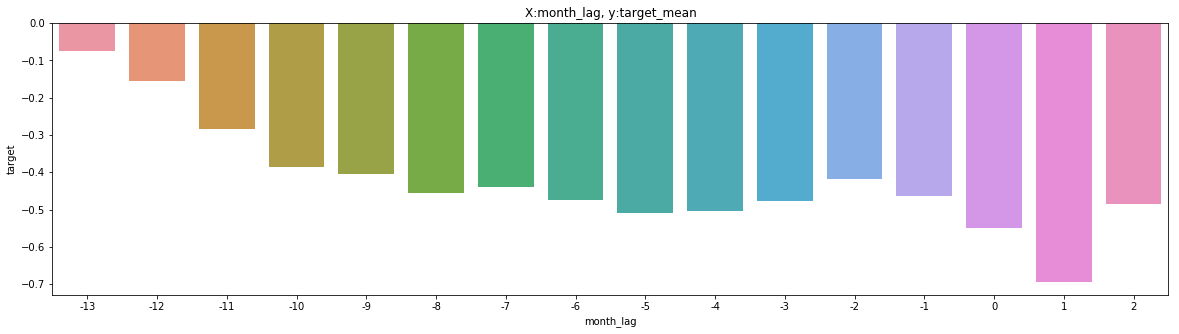

In [79]:
test_df = all_trans_df.groupby(['month_lag']).aggregate({'target': 'mean'}).reset_index()
plt.figure(figsize=(20, 5))
plt.title('X:month_lag, y:target_mean')
plt.xlabel('month_lag')
plt.ylabel('target_mean')
sns.barplot(x='month_lag', y='target', data=test_df)

use purchase_interval, purchase_interval_cut<br/>
features : [first_active_year, authorized_flag, <br/>
            purchase_amount_sum, purchase_amount_sum_log, purchase_amount_mean, purchase_amount_mean_log, <br/>
            purchase_interval_sum, purchase_interval_mean, purchase_interval_cut]

# Category_1, Category_2, Category_3

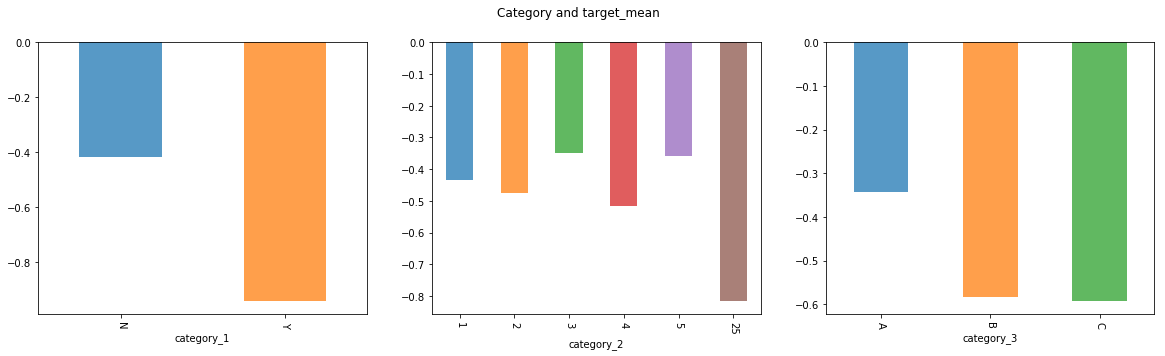

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Category and target_mean')
all_trans_df.groupby(['category_1']).target.mean().plot(kind='bar',alpha=0.75, rot=-90, ax=axes[0])
all_trans_df.groupby(['category_2']).target.mean().plot(kind='bar',alpha=0.75, rot=-90, ax=axes[1])
all_trans_df.groupby(['category_3']).target.mean().plot(kind='bar',alpha=0.75, rot=-90, ax=axes[2])

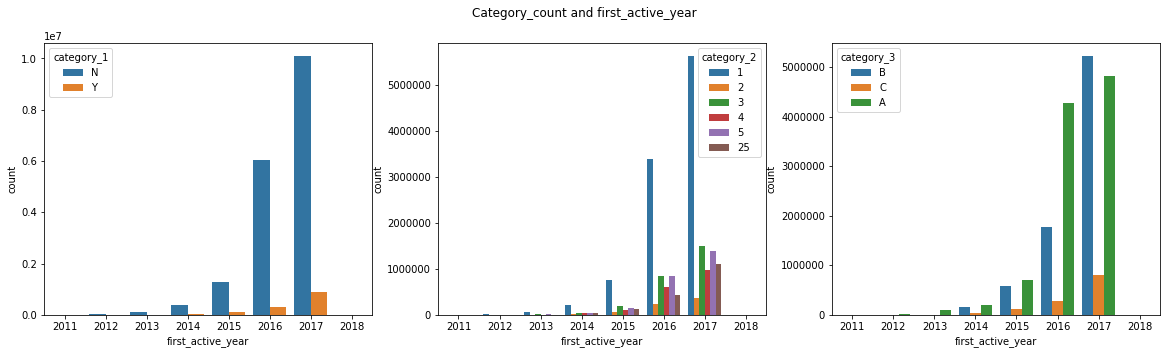

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Category_count and first_active_year')
sns.countplot(x='first_active_year', hue='category_1', data=all_trans_df, ax=axes[0])
sns.countplot(x='first_active_year', hue='category_2', data=all_trans_df, ax=axes[1])
sns.countplot(x='first_active_year', hue='category_3', data=all_trans_df, ax=axes[2])


In [32]:
all_trans_df[['category_1', 'category_2', 'category_3']].dtypes

category_1    object
category_2     uint8
category_3    object
dtype: object

In [33]:
all_trans_df['category_1_label'] = all_trans_df['category_1'].map({'N': 0, 'Y': 1})
all_trans_df['category_2_label'] = all_trans_df['category_2'].apply(lambda x: int(x))
all_trans_df['category_3_label'] = all_trans_df['category_3'].map({'A': 0, 'B': 1, 'C': 2})

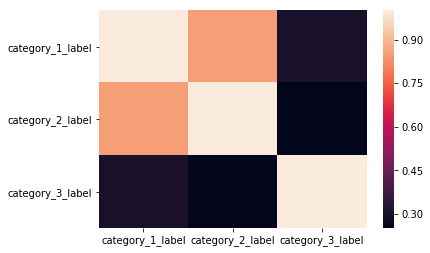

In [51]:
sns.heatmap(all_trans_df[['category_1_label', 'category_2_label', 'category_3_label']].corr())

In [64]:
test_df = all_trans_df.groupby(['card_id']).aggregate({'category_1_label': ['sum', 'mean'], 'category_2_label': ['sum', 'mean'], 
                                                       'category_3_label': ['sum', 'mean'], 'target':'mean'})
tmp_col = []
for col in test_df.columns:
    tmp_col.append('{}_{}'.format(col[0], col[1]))
test_df.columns = tmp_col

category_3_label              target category_2_label  \
                             sum      mean      mean              sum   
card_id                                                                 
C_ID_00007093c1            175.0  1.158940  0.134077             1069   
C_ID_0001506ef0              1.0  0.014706  0.884295              200   
C_ID_000183fdda            191.0  1.273333 -0.264433              540   

                          category_1_label            
                     mean              sum      mean  
card_id                                               
C_ID_00007093c1  7.079470               28  0.185430  
C_ID_0001506ef0  2.941176                0  0.000000  
C_ID_000183fdda  3.483871                4  0.025806

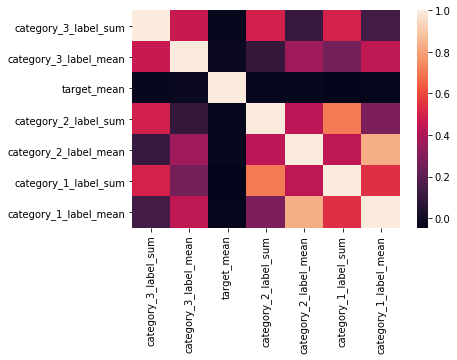

In [71]:
sns.heatmap(test_df.corr())

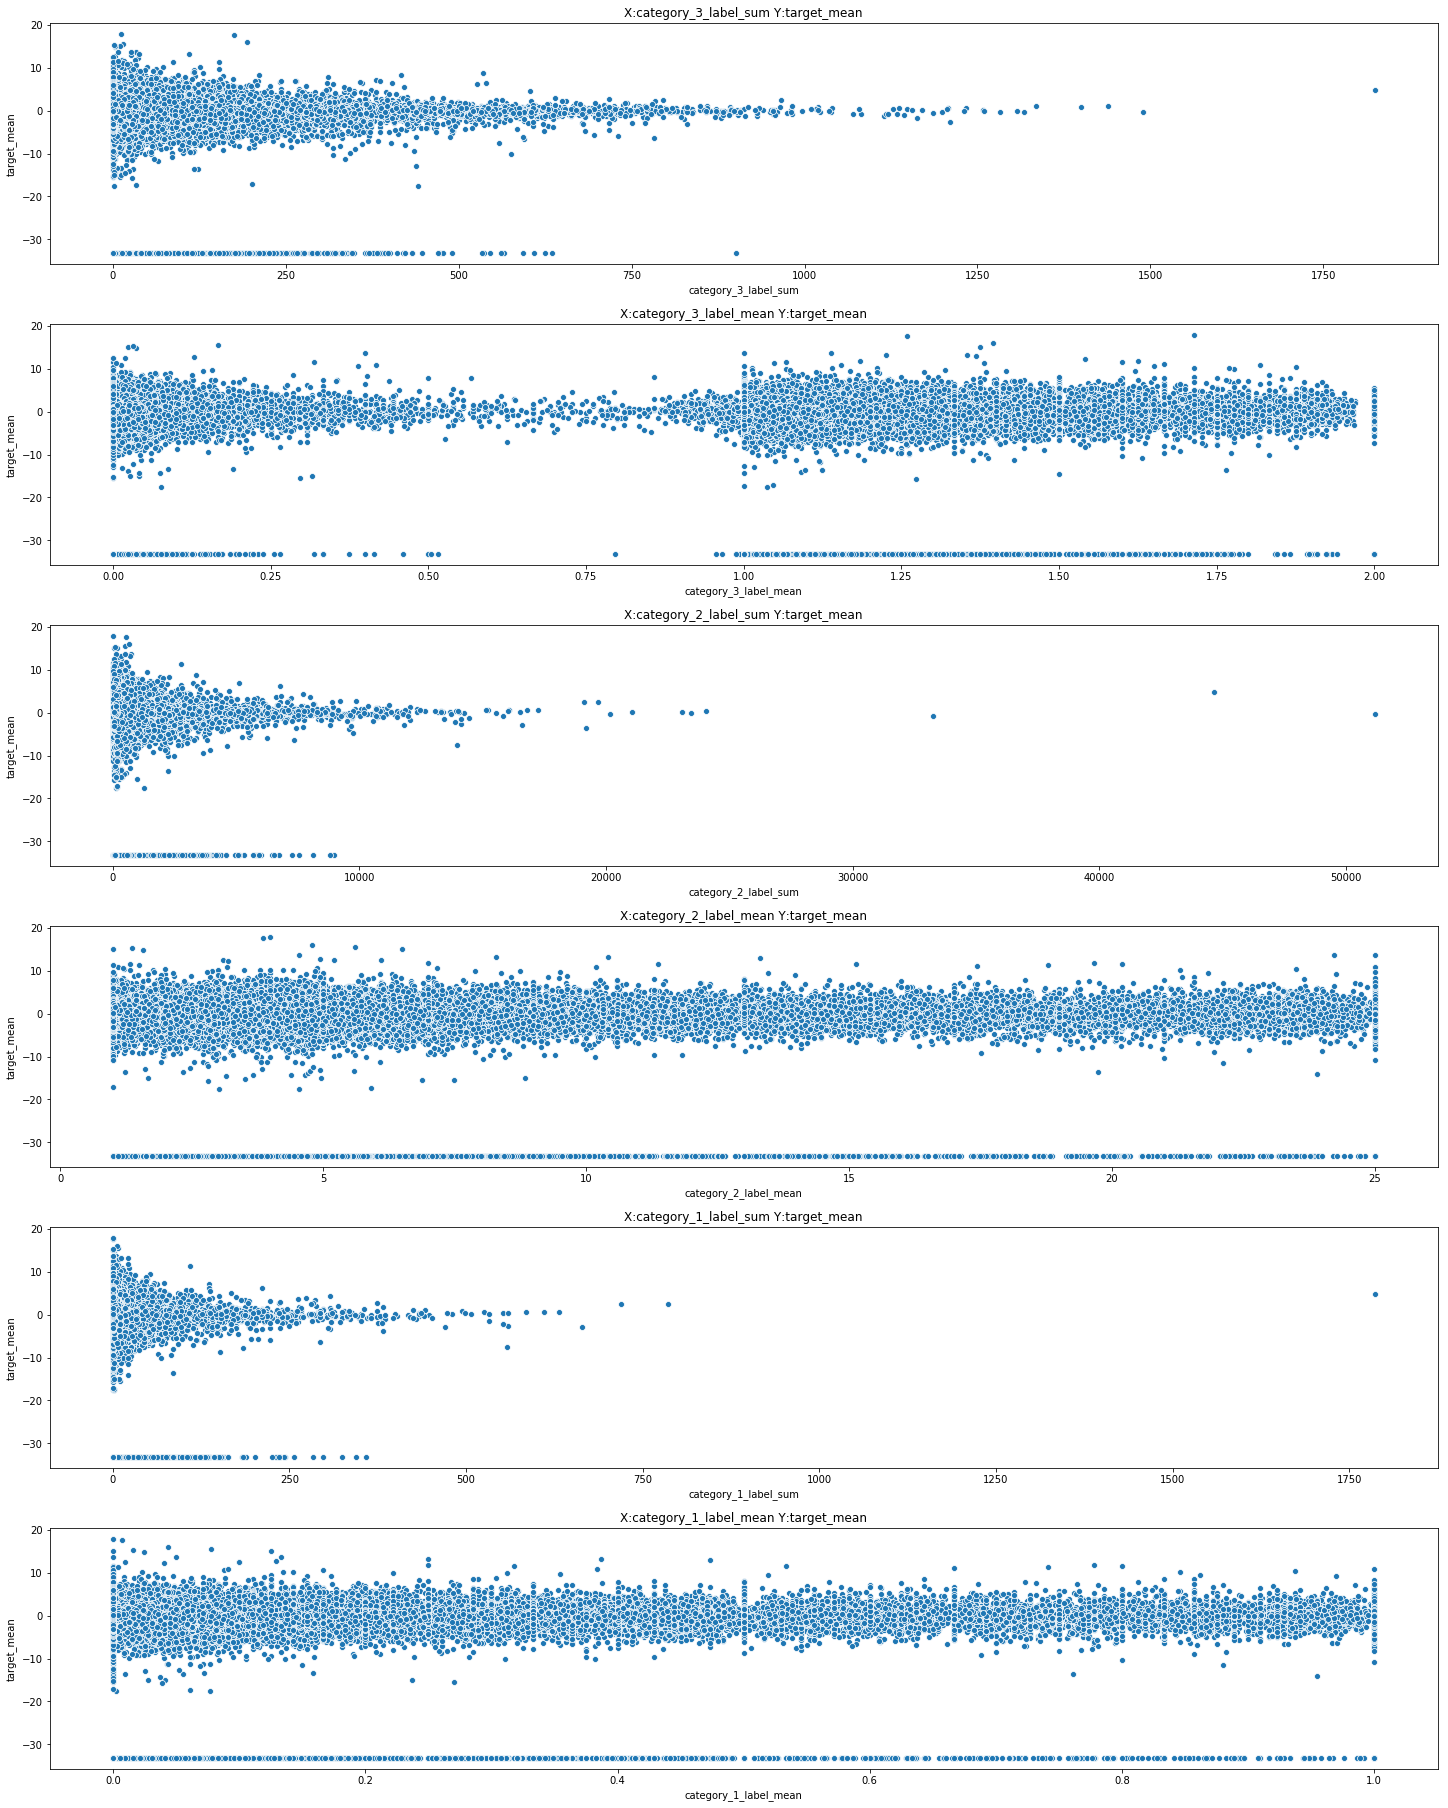

In [75]:
idx = 0
fig, axes = plt.subplots(6, 1, figsize=(20, 25), constrained_layout=True)
for col in test_df.columns:
    if col=='target_mean':
        continue
    sns.scatterplot(x=col, y='target_mean', ax=axes[idx], data=test_df)
    axes[idx].set_title('X:{} Y:{}'.format(col, 'target_mean'))
    idx += 1
    

use category_1_label_sum, category_2_label_sum, category_3_label_sum<br/>
features : [first_active_year, authorized_flag, <br/>
            purchase_amount_sum, purchase_amount_sum_log, purchase_amount_mean, purchase_amount_mean_log, <br/>
            purchase_interval_sum, purchase_interval_mean, purchase_interval_cut, <br/>
            category_1_label_sum, category_2_label_sum, category_3_label_sum]

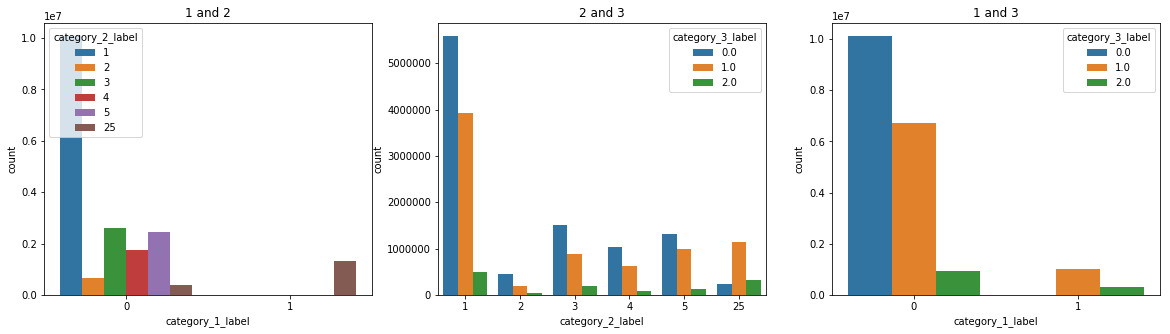

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axes[0].set_title('1 and 2')
sns.countplot(x='category_1_label', hue='category_2_label', data=all_trans_df, ax=axes[0])
axes[1].set_title('2 and 3')
sns.countplot(x='category_2_label', hue='category_3_label', data=all_trans_df, ax=axes[1])
axes[2].set_title('1 and 3')
sns.countplot(x='category_1_label', hue='category_3_label', data=all_trans_df, ax=axes[2])

# installments

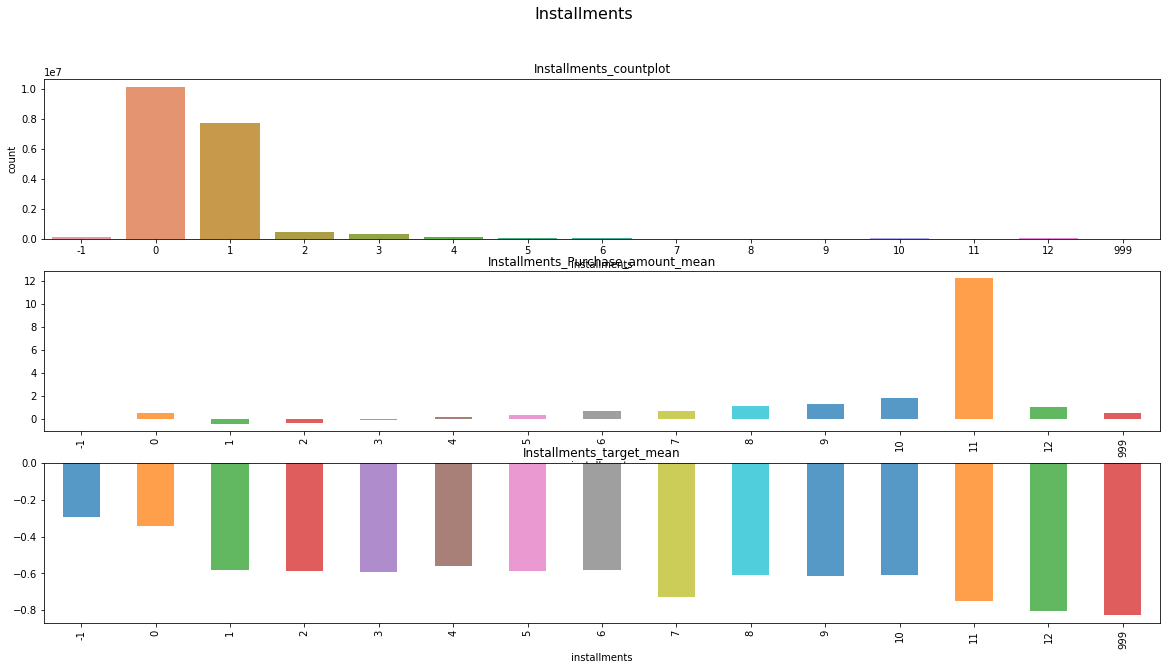

In [36]:
fig, axes = plt.subplots(3, 1, figsize=(20, 10))
fig.suptitle('Installments', fontsize=16)
axes[0].set_title('Installments_countplot')
sns.countplot(x='installments', data=all_trans_df, ax=axes[0])
axes[1].set_title('Installments_Purchase_amount_mean')
all_trans_df.groupby(['installments']).purchase_amount.mean().plot(kind='bar', alpha=0.75, ax=axes[1])
axes[2].set_title('Installments_target_mean')
all_trans_df.groupby(['installments']).target.mean().plot(kind='bar', alpha=0.75, ax=axes[2])

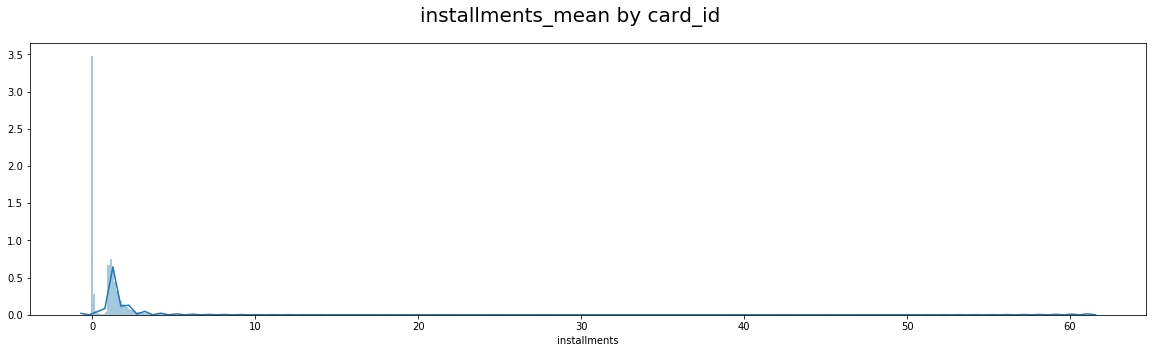

In [37]:
test_df = all_trans_df.groupby(['card_id']).aggregate({'installments': 'mean'})
fig = plt.figure(figsize=(20, 5))
fig.suptitle('installments_mean by card_id', fontsize=20)
sns.distplot(test_df.installments, bins=500)

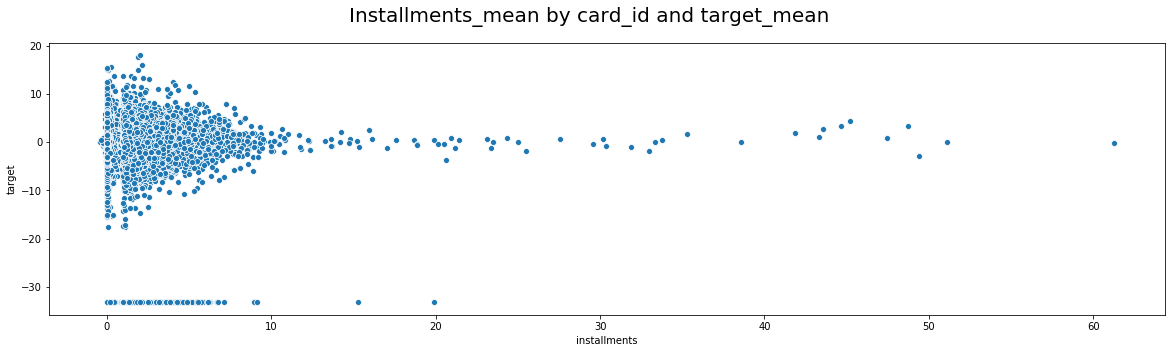

In [38]:
fig = plt.figure(figsize=(20, 5))
fig.suptitle('Installments_mean by card_id and target_mean', fontsize=20)
test_df = all_trans_df.groupby(['card_id']).aggregate({'installments':'mean', 'target':'mean'})
sns.scatterplot(x='installments', y='target', data=test_df)

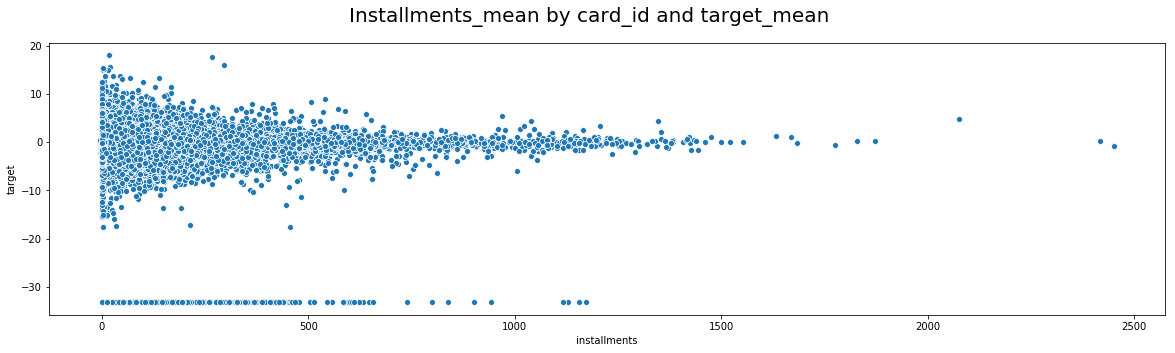

In [42]:
fig = plt.figure(figsize=(20, 5))
fig.suptitle('Installments_mean by card_id and target_mean', fontsize=20)
test_df = all_trans_df.groupby(['card_id']).aggregate({'installments':'sum', 'target':'mean'})
sns.scatterplot(x='installments', y='target', data=test_df)

use installments_mean, installments_sum<br/>
features : [first_active_year, authorized_flag, <br/>
            purchase_amount_sum, purchase_amount_sum_log,<br/>
            purchase_amount_mean, purchase_amount_mean_log, <br/>
            purchase_interval_sum, purchase_interval_mean, purchase_interval_cut, <br/>
            category_1_label_sum, category_2_label_sum, category_3_label_sum, <br/>
            installments_mean, installments_sum]

In [39]:
print('[*]category_3 (installments == -1) : {}'.format(all_trans_df.query('installments == -1')['category_3'].unique()))
print('[*]installments (category_3 == null) : {}'.format(all_trans_df[all_trans_df['category_3'].isnull()]['installments'].unique()))
#[cetogory_3 == None] <-> [installments == -1]
#catogory_3(None) and installments(-1) -> cancle purchase

[*]category_3 (installments == -1) : [nan]
[*]installments (category_3 == null) : [-1]


In [40]:
all_trans_df[all_trans_df['installments']==999]

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,first_active_month,feature_1,feature_2,feature_3,target,first_active_year,purchase_amount_log,purchase_interval,category_1_label,category_2_label,category_3_label
227606,N,C_ID_8b04d4734e,210,N,999,C,806,M_ID_0155450c84,-11,6.237415,2017-03-28 19:40:50,1,16,9,2016-12-01,1,1,0,0.138370,2016,1.979264,117,0,1,2.0
466436,N,C_ID_7670e569a0,333,N,999,C,813,M_ID_c9526f2dd3,-10,-0.443673,2017-04-12 21:06:28,5,21,29,2017-02-01,2,1,0,-0.520812,2017,-0.586399,70,0,5,2.0
759501,N,C_ID_652976a4bb,19,N,999,C,356,M_ID_2570628257,-8,0.469038,2017-06-05 09:22:18,1,9,21,2017-05-01,2,2,0,-0.974942,2017,0.384607,35,0,1,2.0
1182532,N,C_ID_24fb1a2959,331,N,999,C,117,M_ID_67a62f2671,-3,0.208778,2017-11-05 01:29:18,1,16,2,2016-08-01,5,2,1,-0.133152,2016,0.189610,461,0,1,2.0
1221217,N,C_ID_ba84d050f5,19,N,999,C,884,M_ID_8e7a785122,-8,-0.296127,2017-06-25 16:09:55,1,9,27,2017-06-01,1,1,0,0.169486,2017,-0.351158,24,0,1,2.0
1368209,N,C_ID_5b6278eb25,69,N,999,C,683,M_ID_f86439cec0,-6,-0.674179,2017-08-23 12:39:48,1,9,34,2017-06-01,1,1,0,-1.656900,2017,-1.121409,83,0,1,2.0
1767608,N,C_ID_9cea123f42,181,N,999,C,90,M_ID_596749cc5a,0,-0.318652,2018-02-23 17:29:00,5,5,22,2016-11-01,1,1,0,-0.049503,2016,-0.383682,479,0,5,2.0
3128460,N,C_ID_c379d12476,42,N,999,C,419,M_ID_eaddfae8a1,-8,-0.611669,2017-06-13 17:28:35,3,19,1,2017-01-01,5,1,1,0.324397,2017,-0.945898,163,0,3,2.0
3323423,N,C_ID_ef6709bf85,190,N,999,C,225,M_ID_5cce2da9c8,-2,4.624259,2017-11-30 10:42:06,3,7,9,2017-11-01,4,3,0,-1.083254,2017,1.727089,29,0,3,2.0
3440873,N,C_ID_c9d2343ab0,117,N,999,C,422,M_ID_5958549349,-10,-0.356218,2017-04-18 15:09:22,1,9,27,2016-10-01,3,1,1,-1.153991,2016,-0.440396,199,0,1,2.0


# city_id and merchant_category_id

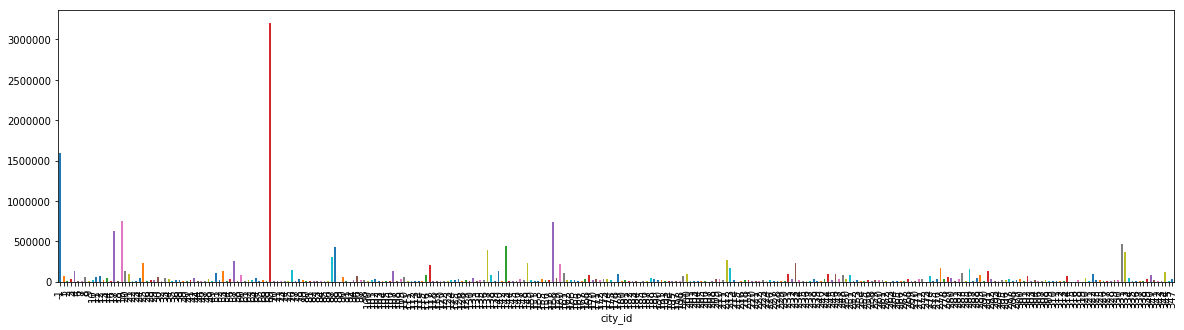

In [127]:
fig = plt.figure(figsize=(20, 5))
all_trans_df.groupby(['city_id']).size().plot(kind='bar')

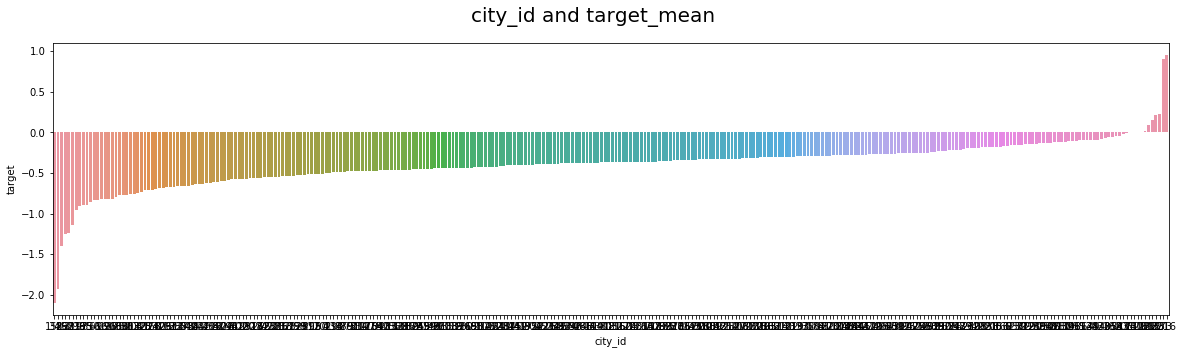

In [149]:
fig = plt.figure(figsize=(20, 5))
fig.suptitle('city_id and target_mean', fontsize=20)
test_df = all_trans_df.groupby(['city_id']).target.mean().reset_index().sort_values(by=['target'])
sns.barplot(x='city_id', y='target', data=test_df, order=test_df.city_id)

In [145]:
test_df = all_trans_df.groupby(['city_id']).size().reset_index()
test_df.columns = ['city_id', 'city_id_cnt']
test_df_2 = all_trans_df.groupby(['city_id']).target.mean().reset_index()
test_df = pd.merge(test_df, test_df_2, on=['city_id'], how='left')

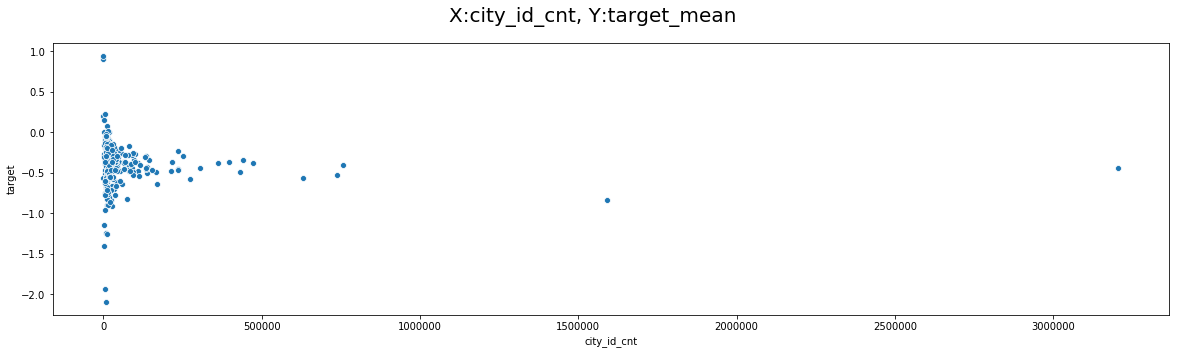

In [148]:
fig = plt.figure(figsize=(20, 5))
fig.suptitle('X:city_id_cnt, Y:target_mean', fontsize=20)
sns.scatterplot(x='city_id_cnt', y='target', data=test_df)

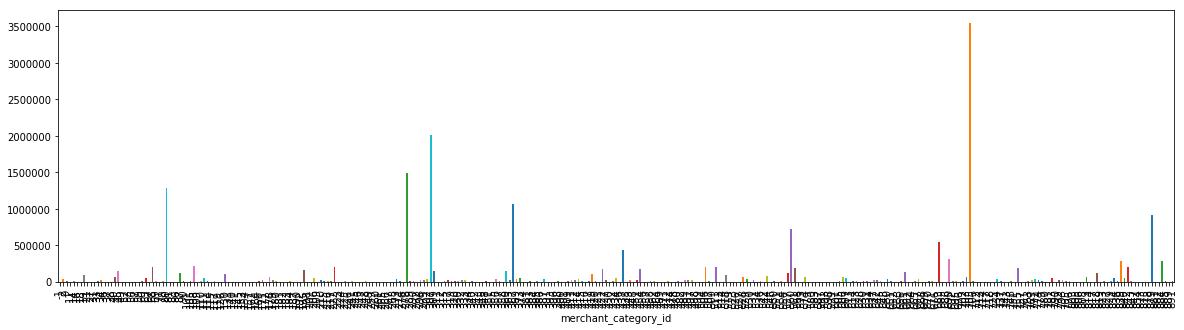

In [155]:
fig = plt.figure(figsize=(20, 5))
all_trans_df.groupby(['merchant_category_id']).size().plot(kind='bar')

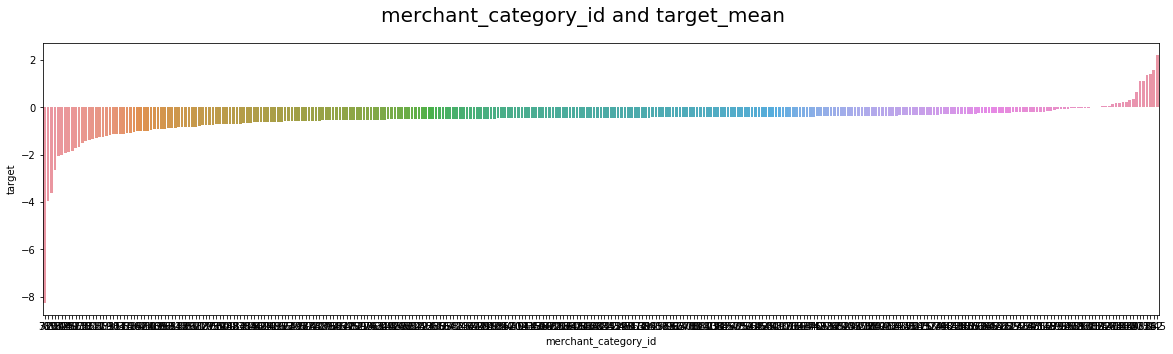

In [154]:
fig = plt.figure(figsize=(20, 5))
fig.suptitle('merchant_category_id and target_mean', fontsize=20)
test_df = all_trans_df.groupby(['merchant_category_id']).target.mean().reset_index().sort_values(by=['target'])
sns.barplot(x='merchant_category_id', y='target', data=test_df, order=test_df.merchant_category_id)

In [151]:
test_df = all_trans_df.groupby(['merchant_category_id']).size().reset_index()
test_df.columns = ['merchant_category_id', 'merchant_category_id_cnt']
test_df_2 = all_trans_df.groupby(['merchant_category_id']).target.mean().reset_index()
test_df = pd.merge(test_df, test_df_2, on=['merchant_category_id'], how='left')

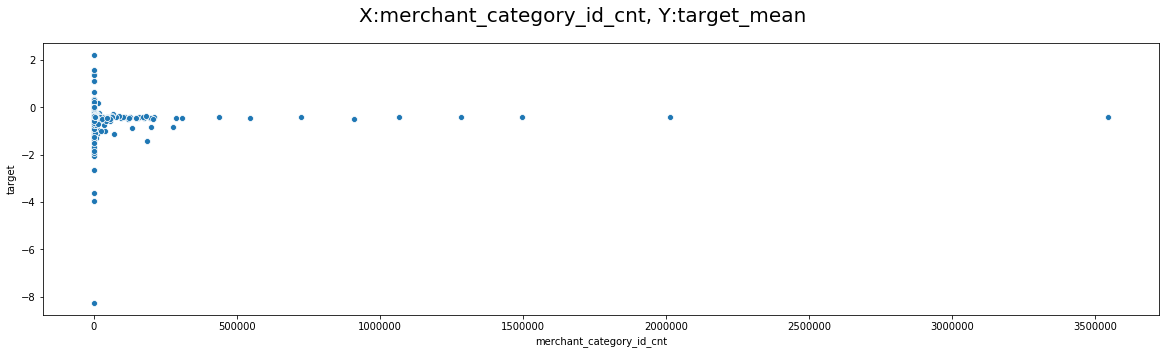

In [152]:
fig = plt.figure(figsize=(20, 5))
fig.suptitle('X:merchant_category_id_cnt, Y:target_mean', fontsize=20)
sns.scatterplot(x='merchant_category_id_cnt', y='target', data=test_df)

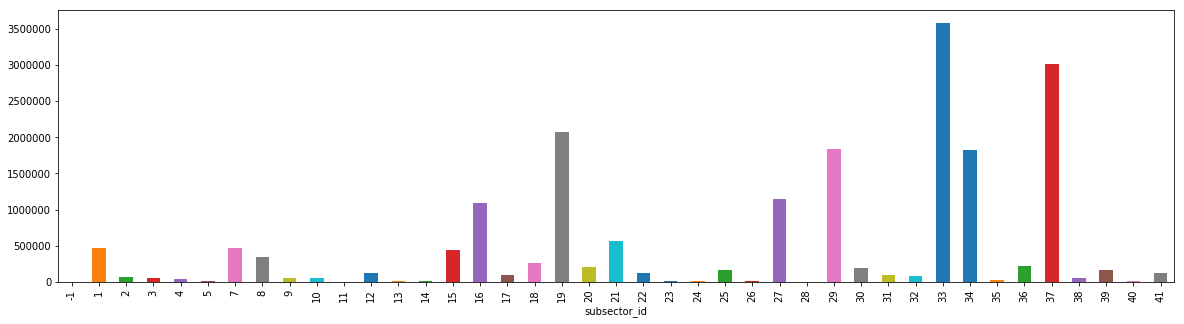

In [156]:
fig = plt.figure(figsize=(20, 5))
all_trans_df.groupby(['subsector_id']).size().plot(kind='bar')

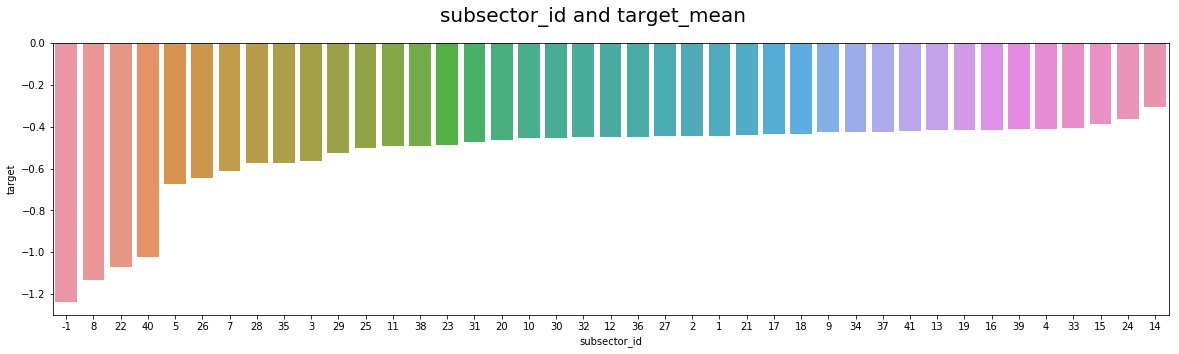

In [157]:
fig = plt.figure(figsize=(20, 5))
fig.suptitle('subsector_id and target_mean', fontsize=20)
test_df = all_trans_df.groupby(['subsector_id']).target.mean().reset_index().sort_values(by=['target'])
sns.barplot(x='subsector_id', y='target', data=test_df, order=test_df.subsector_id)

In [158]:
test_df = all_trans_df.groupby(['subsector_id']).size().reset_index()
test_df.columns = ['subsector_id', 'subsector_id_cnt']
test_df_2 = all_trans_df.groupby(['subsector_id']).target.mean().reset_index()
test_df = pd.merge(test_df, test_df_2, on=['subsector_id'], how='left')

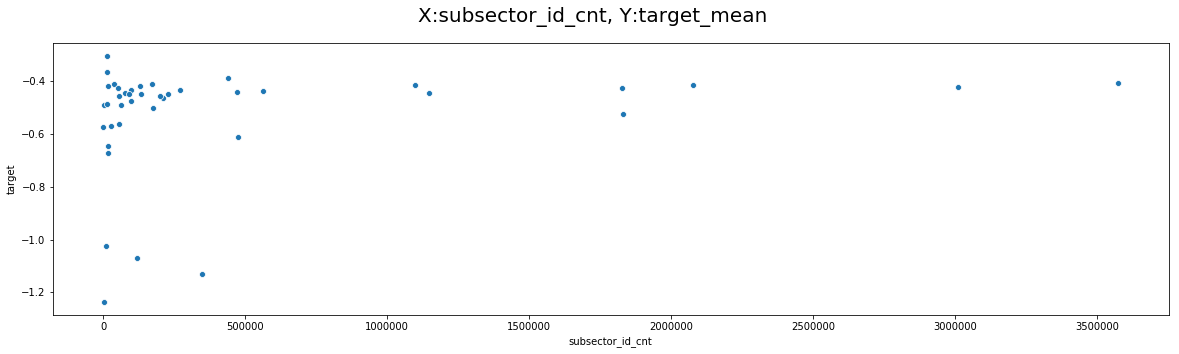

In [159]:
fig = plt.figure(figsize=(20, 5))
fig.suptitle('X:subsector_id_cnt, Y:target_mean', fontsize=20)
sns.scatterplot(x='subsector_id_cnt', y='target', data=test_df)